In [70]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import random as rd

import matplotlib as mpl

from scipy import stats

import statsmodels.api as sm

import warnings

from itertools import product

from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import adfuller,acf,pacf,arma_order_select_ic

import statsmodels.formula.api as smf

import statsmodels.tsa.api as smt

import scipy.stats as scs

from matplotlib.pylab import rcParams

import warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn-poster")

from matplotlib.pylab import rcParams

rcParams["figure.figsize"]=8,4

In [71]:
drug=pd.read_csv(r"C:\Users\boses\OneDrive\Desktop\Data Science using Python\Australian Drug Sales.csv",parse_dates=True)

In [72]:
drug

,date,value
0,7/1/1991,3.526591
1,8/1/1991,3.180891
2,9/1/1991,3.252221
3,10/1/1991,3.611003
4,11/1/1991,3.565869
...,...,...
199,2/1/2008,21.654285
200,3/1/2008,18.264945
201,4/1/2008,23.107677
202,5/1/2008,22.912510


In [73]:
drug.isnull().sum()

date     0
value    0
dtype: int64

In [74]:
drug.shape

(204, 2)

In [75]:
drug1=drug["value"]

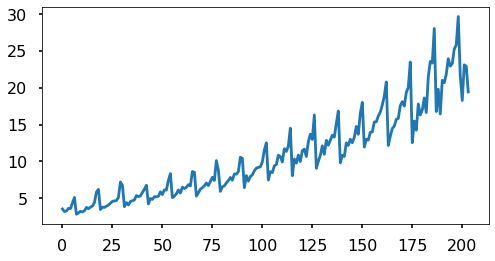

In [76]:
plt.plot(drug1)

In [79]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller test:')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','No. of observations used'])
    for key,value in df_test[4].items():
        df_output['Critical value (%s)'% key]=value
    print(df_output)
test_stationarity(drug1)

Results of Dickey-Fuller test:
Test Statistic                3.145186
p-value                       1.000000
Lags Used                    15.000000
No. of observations used    188.000000
Critical value (1%)          -3.465620
Critical value (5%)          -2.877040
Critical value (10%)         -2.575032
dtype: float64


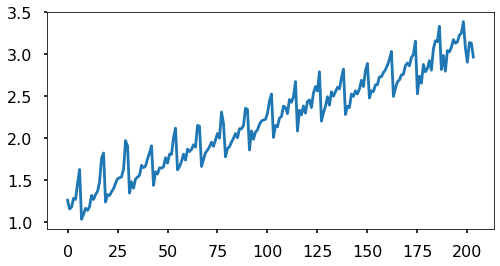

In [80]:
logarithm=np.log(drug1)
plt.plot(logarithm)

In [82]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller test:')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','No. of observations used'])
    for key,value in df_test[4].items():
        df_output['Critical value (%s)'% key]=value
    print(df_output)
test_stationarity(logarithm)

Results of Dickey-Fuller test:
Test Statistic               -0.988733
p-value                       0.757351
Lags Used                    14.000000
No. of observations used    189.000000
Critical value (1%)          -3.465431
Critical value (5%)          -2.876957
Critical value (10%)         -2.574988
dtype: float64


In [83]:
expdecay=logarithm.ewm(halflife=10,min_periods=0,adjust=True).mean()

In [87]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller test:')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','No. of observations used'])
    for key,value in df_test[4].items():
        df_output['Critical value (%s)'% key]=value
    print(df_output)
test_stationarity(expdecay)

Results of Dickey-Fuller test:
Test Statistic               -0.071131
p-value                       0.952239
Lags Used                    15.000000
No. of observations used    188.000000
Critical value (1%)          -3.465620
Critical value (5%)          -2.877040
Critical value (10%)         -2.575032
dtype: float64


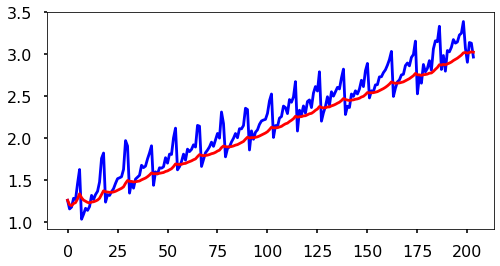

In [88]:
plt.plot(logarithm,color='blue')
plt.plot(expdecay,color='red')

In [89]:
detrend1=logarithm-expdecay

In [90]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller test:')
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','No. of observations used'])
    for key,value in df_test[4].items():
        df_output['Critical value (%s)'% key]=value
    print(df_output)
test_stationarity(detrend1)

Results of Dickey-Fuller test:
Test Statistic               -4.506413
p-value                       0.000191
Lags Used                    14.000000
No. of observations used    189.000000
Critical value (1%)          -3.465431
Critical value (5%)          -2.876957
Critical value (10%)         -2.574988
dtype: float64


<AxesSubplot:>

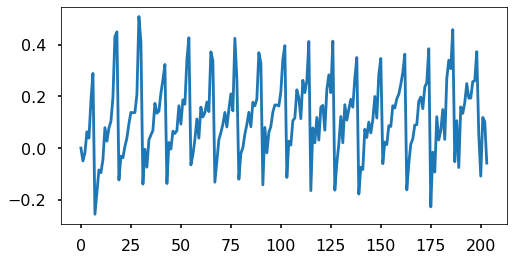

In [91]:
detrend1.plot()

<AxesSubplot:>

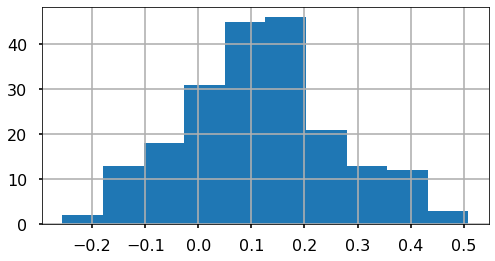

In [92]:
detrend1.hist()

<AxesSubplot:ylabel='Density'>

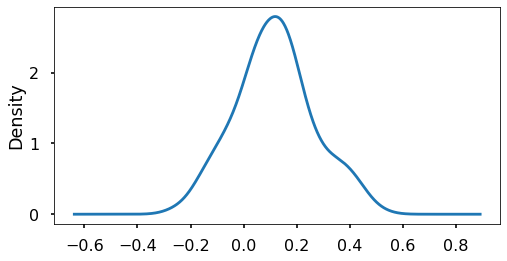

In [93]:
detrend1.plot(kind="kde")

In [94]:
detrend1.describe()

count    204.000000
mean       0.116958
std        0.147980
min       -0.255750
25%        0.025442
50%        0.114941
75%        0.195186
max        0.508529
Name: value, dtype: float64

In [104]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

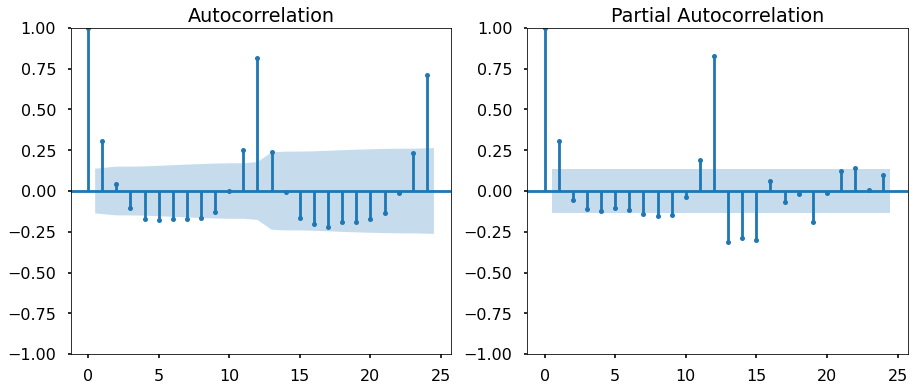

In [105]:
fig=plt.figure(figsize=(15,6))
ax1=fig.add_subplot(121)
fig=sm.graphics.tsa.plot_acf(detrend1.values,ax=ax1)
ax2=fig.add_subplot(122)
fig=sm.graphics.tsa.plot_pacf(detrend1.values,ax=ax2)

In [107]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
model=ARIMA(detrend1,order=(3,1,4))

In [111]:
results_ARIMA=model.fit()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 118.372
Date:                Sun, 28 Aug 2022   AIC                           -220.745
Time:                        22:08:47   BIC                           -194.239
Sample:                             0   HQIC                          -210.022
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2302      0.099    -12.421      0.000      -1.424      -1.036
ar.L2         -0.9587      0.093    -10.277      0.000      -1.142      -0.776
ar.L3         -0.7213      0.073     -9.916      0.0

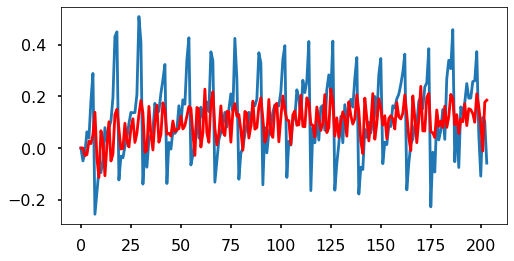

In [112]:
plt.plot(detrend1)
plt.plot(results_ARIMA.fittedvalues,color='red')
print(results_ARIMA.summary())

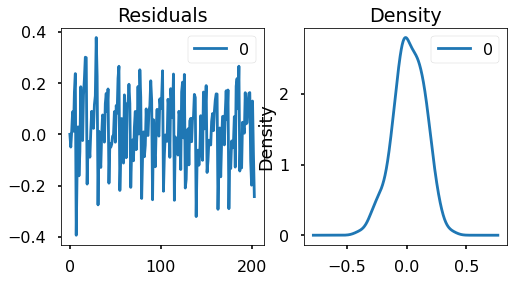

In [113]:
residuals=pd.DataFrame(results_ARIMA.resid)
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.show()

In [114]:
residuals.describe()

,0
count,204.000000
mean,0.019893
std,0.133910
min,-0.394169
25%,-0.062727
50%,0.014810
75%,0.118952
max,0.378039


In [115]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [117]:
print(sm.stats.durbin_watson(residuals.values))

[1.71058844]


In [119]:
acorr_ljungbox(residuals,lags=15)

,lb_stat,lb_pvalue
1,2.793713,9.463474e-02
2,4.004629,1.350224e-01
3,6.063058,1.085823e-01
4,16.430347,2.492866e-03
5,26.693859,6.543023e-05
6,29.017304,6.037991e-05
7,32.689954,3.023940e-05
8,47.046645,1.502302e-07
9,47.084717,3.784600e-07
10,47.227750,8.583297e-07
